In [1]:
import numpy as np
import os
import pyrsimg
import rasterio as rio


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
path_raster = 'docs/source/examples/data/l8_scene_05.tif'


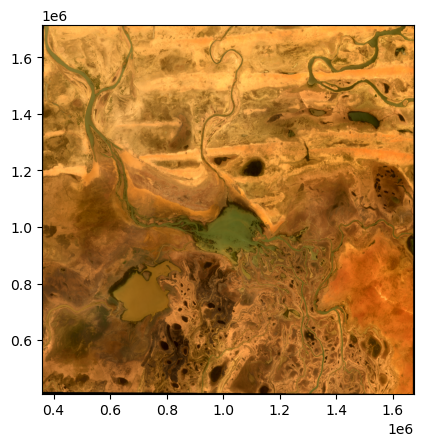

In [ ]:
img_rio = rio.open(path_raster)

pyrsimg.imgShow(img_rio.read().transpose(1, 2, 0), 
                extent=img_rio.bounds)


In [5]:
path_raster = 'docs/source/examples/data/l8_scene_05_truth.tif'
path_save = 'tmp.shp'
dn_values = [1]


In [6]:
def raster2vec(path_raster, path_save, dn_values):
    ''' 
    des: Read input band with Rasterio
    input:
        raster_path, output_path: raster and ouput vector path
        dn_values: list, consist of the raster value to be vectorization
    return:
        vector (gpkg format) written to the given path.
    '''
    raster_ds = gdal.Open(path_raster)
    raster_band = raster_ds.GetRasterBand(1)
    raster_srs = osr.SpatialReference()
    raster_srs.ImportFromWkt(raster_ds.GetProjection())
    #  create output datasource
    dst_layername = "polygon"
    drv = ogr.GetDriverByName('ESRI Shapefile')
    dst_ds = drv.CreateDataSource(path_save)
    dst_layer = dst_ds.CreateLayer(dst_layername, geom_type=ogr.wkbPolygon, srs = raster_srs)
    newField = ogr.FieldDefn('DN', ogr.OFTInteger)
    dst_layer.CreateField(newField)
    dst_field = dst_layer.GetLayerDefn().GetFieldIndex('DN')
    print(dst_layer.GetFeatureCount())
    gdal.Polygonize(raster_band, None, dst_layer, dst_field, [])
    print(dst_layer.GetFeatureCount())
    for i in range(dst_layer.GetFeatureCount()):
      fea = dst_layer.GetFeature(i)
      if fea.GetField('DN') not in dn_values:
        dst_layer.DeleteFeature(i)
    dst_ds = None



In [8]:
raster2vec(path_raster, path_save, dn_values)



0
206
